# Demo and test environments

In [1]:
%reload_ext autoreload
%autoreload 2
import gym
import matplotlib.pyplot as plt
from ezai.env import env_info
import numpy as np
import copy
import yaml

In [2]:
from IPython.display import display,Javascript
import ipywidgets
env_map={'ride-v0':'0.4.3',
        'arora-v0':'2.10.15'}
env_dd = ipywidgets.Dropdown(
       options=list(env_map.keys()),
       value=list(env_map.keys())[0],
       description='Environment:')
ver = ipywidgets.Text(
       value=list(env_map.values())[0],
       description='Version:', )
def nxtHandler(b):
    display(Javascript('Jupyter.notebook.select_next().get_selected_cell()'))
    #get_ipython().set_next_input(replace=False)
    
nxt = ipywidgets.Button(description='Next Cell')
nxt.on_click(nxtHandler)

def update_ver(*args):
    ver.value = env_map.get(env_dd.value)
    
env_dd.observe(update_ver, 'value')
box = ipywidgets.HBox([env_dd,ver,nxt])
display(box)

In [4]:
env_id = env_dd.value

if env_id=="ride-v0":
#from navsim_envs import ride as navenv
    from navsim_envs.ride import default_env_config
    from navsim_envs.ride import RideUnityEnv as UnityEnv
    from navsim_envs.ride import RideGymEnv as GymEnv
    env_path = f"/data/work/unity-envs/RIDE_{ver.value}/RIDE"
elif env_id=="arora-v0":
    from navsim_envs.arora import default_env_config
    from navsim_envs.arora import AroraUnityEnv as UnityEnv
    from navsim_envs.arora import AroraGymEnv as GymEnv
    env_path = f"/data/work/unity-envs/ARORA_{ver.value}/ARORA"
print(env_id,':',env_path)

arora-v0 : /data/work/unity-envs/ARORA_2.10.15/ARORA


In [5]:
env_config = None
def config():
    global env_config
    env_config = default_env_config.copy()
    env_config["env_path"]=env_path
    env_config["seed"]=123
    env_config["timeout"]=60
    env_config["obs_mode"]=1
    print(yaml.dump(env_config))
config()

agent_car_physics: 0
area: 0
base_port: 5004
debug: false
env_gpu_id: 0
env_path: /data/work/unity-envs/ARORA_2.10.15/ARORA
episode_max_steps: 1000
goal: 0
goal_clearance: 2.5
goal_distance: 50
log_folder: ./env_log
obs_height: 64
obs_mode: 1
obs_width: 64
relative_steering: true
reward_collision_mul: 4
reward_for_goal: 50
reward_for_no_viable_path: -50
reward_spl_delta_mul: 1
reward_step_mul: 0.1
save_actions: true
save_vector_obs: true
save_visual_obs: true
seed: 123
segmentation_mode: 1
show_visual: false
start_from_episode: 1
task: 0
timeout: 60
traffic_vehicles: 0
worker_id: 0



# The UnityEnv

In [ ]:
#env_config["env_path"]=None
uenv = UnityEnv(env_config)

In [ ]:
uenv.reset()

In [ ]:
print(uenv.unity_max_x,uenv.unity_max_z)

In [ ]:
print(uenv.navmap_max_x,uenv.navmap_max_y)

In [ ]:
print(uenv.shortest_path)

In [ ]:
!nvidia-smi

In [ ]:
!ps -aux | grep crt

In [ ]:
uenv.close()

In [ ]:
env_config["env_gpu_id"]=1
uenv = UnityEnv(env_config)
uenv.reset()

In [ ]:
print(uenv.unity_max_x,uenv.unity_max_z)

In [ ]:
!nvidia-smi

In [ ]:
!ps -aux | grep crt

In [ ]:
uenv.close()

# The GymEnv

In [ ]:
# look at all observation modes
for i in UnityEnv.observation_modes:
    env_config["obs_mode"]=i
    env = gym.make(env_id, env_config=env_config) # ride.RideGymEnv(env_config)
    print('Observation Mode {}'.format(env_config["obs_mode"]))
    env_info(env)
    obs = env.reset()
    env.close()
    del env

In [ ]:
# test for 5 steps forward and 5 steps back 
env_config["obs_mode"]=1
env_config["env_gpu_id"]=0
#env_config["show_visual"]=True

env = gym.make(env_id, env_config=env_config)

steps = 5
obs = env.reset()
#print(obs)
print("Forward:")
for i in range(steps):
    obs = env.step(UnityEnv.actions['forward'])
    #print(obs[-1])
    #plt.imshow(env.render(mode='rgb_array'))
    #plt.show()
    #plt.imshow(env.render(mode='depth'))
    #plt.show()
    #plt.imshow(env.render(mode='segmentation'))
    #plt.show()
print("Backward:")
for i in range(steps):
    obs = env.step(UnityEnv.actions['backward'])
    #print(obs[-1])
    #plt.imshow(env.render(mode='rgb_array'))
    #plt.show()
    #plt.imshow(env.render(mode='depth'))
    #plt.show()
    #plt.imshow(env.render(mode='segmentation'))
    #plt.show()
env.close()
del env

In [ ]:
# test for 5 steps forward and 5 steps back 
env_config["obs_mode"]=1
env_config["env_gpu_id"]=1
#env_config["show_visual"]=True

env = gym.make(env_id, env_config=env_config)

steps = 200
obs = env.reset()
#print(obs)
print("Forward:")
for i in range(steps):
    obs = env.step(UnityEnv.actions['forward'])
    #print(obs[-1])
    #plt.imshow(env.render(mode='rgb_array'))
    #plt.show()
    #plt.imshow(env.render(mode='depth'))
    #plt.show()
    #plt.imshow(env.render(mode='segmentation'))
    #plt.show()
print("Backward:")
for i in range(steps):
    obs = env.step(UnityEnv.actions['backward'])
    #print(obs[-1])
    #plt.imshow(env.render(mode='rgb_array'))
    #plt.show()
    #plt.imshow(env.render(mode='depth'))
    #plt.show()
    #plt.imshow(env.render(mode='segmentation'))
    #plt.show()
env.close()
del env

# The mapping capabilities

In [7]:
config()

agent_car_physics: 0
area: 0
base_port: 5004
debug: false
env_gpu_id: 0
env_path: /data/work/unity-envs/ARORA_2.10.15/ARORA
episode_max_steps: 1000
goal: 0
goal_clearance: 2.5
goal_distance: 50
log_folder: ./env_log
obs_height: 64
obs_mode: 1
obs_width: 64
relative_steering: true
reward_collision_mul: 4
reward_for_goal: 50
reward_for_no_viable_path: -50
reward_spl_delta_mul: 1
reward_step_mul: 0.1
save_actions: true
save_vector_obs: true
save_visual_obs: true
seed: 123
segmentation_mode: 1
show_visual: false
start_from_episode: 1
task: 0
timeout: 60
traffic_vehicles: 0
worker_id: 0



In [8]:
env = gym.make(env_id, env_config=env_config)

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment from /data/work/unity-envs/ARORA_2.10.15/ARORA at port 5004 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0


/data/afandang/projects/ai_coop_py/navsim-mlagents/ml-agents-envs/mlagents_envs/rpc_utils.py:376: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.bool,


In [9]:
navmap = env.get_navigable_map()

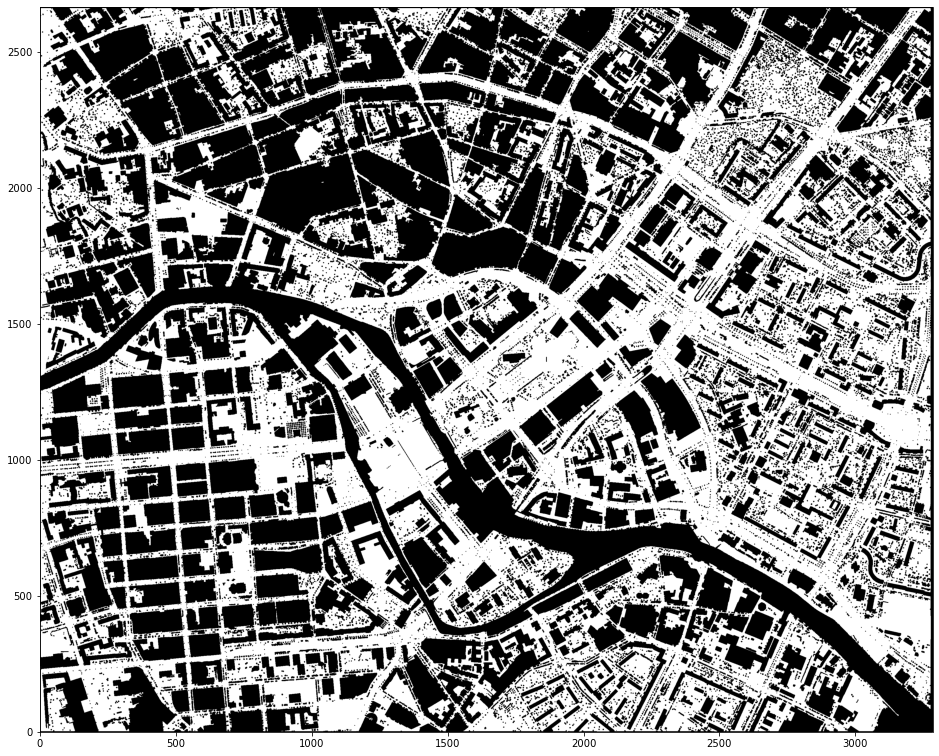

In [10]:
plt.figure(figsize=(16,16))
plt.imshow(navmap,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.show()

In [17]:
area1 = [env.get_navigable_map_zoom(x,y) 
         for y in range(20) 
             for x in range(30)]


In [18]:
area2 = env.get_navigable_map_zoom_area(0,0,29,19)

In [19]:
print(area1[0].shape)
print(len(area1))
print(area2.shape)

(100, 100)
600
(2000, 3000)


In [14]:
f, axs = plt.subplots(30,30,figsize=(8,8),sharex=True,sharey=True)
idx=0
for y in range(30):
    for x in range(30): 
        plt.subplot(30, 30, idx+1)
        plt.imshow(area1[idx],origin='lower',cmap='gray', vmin=0, vmax=1)
        idx+=1
f.tight_layout()
for ax in axs.flatten():
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
#plt.figure(figsize=(1, 1))
plt.show()


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f0a05ce59d0> (for post_execute):



KeyboardInterrupt



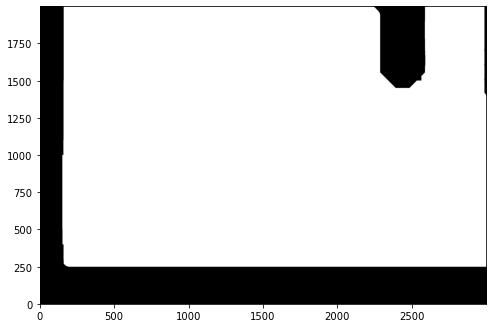

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(area2,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.show()

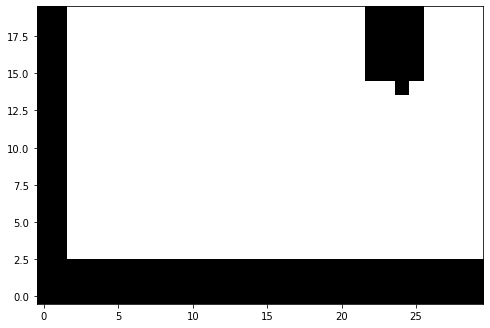

In [22]:
plt.figure(figsize=(8,8))
plt.imshow(navmap[0:20,0:30],origin='lower',cmap='gray', vmin=0, vmax=1)
plt.show()

In [ ]:
env.close()

In [28]:
t1 = np.array([[1,1,1],[1.1,1.1,1.1]])
t2 = np.array([[2,2,2],[1.1,1.1,1.1]])
t3 = np.array([[3,3,3],[1.1,1.1,1.1]])
print(t1.shape,t2.shape,t3.shape)

(2, 3) (2, 3) (2, 3)


In [30]:
t4=np.concatenate(
    (t1,t2,t3)
    ,axis=1
)
print(t4.shape)

(2, 9)
